In [1]:
import sklearn
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,minmax_scale,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score
from sklearn.impute import SimpleImputer,KNNImputer




from keras.models import Sequential
from keras.layers import InputLayer,Dense,BatchNormalization,Dropout
from keras import regularizers

In [31]:
# Loading the data set
df=pd.read_csv("test.csv")

In [32]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [14]:
df['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [15]:
# checking wether the data set is imbalanced or not
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

In [16]:
df.shape

(25976, 25)

In [17]:
# removing the identical columns like "Unnamed: 0","id"
# because it dont impact the target,
# 
df=df.drop(columns=["Unnamed: 0","id"])

In [18]:
df.shape

(25976, 23)

In [19]:
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [20]:
df["satisfaction"] = df["satisfaction"].map({
    "satisfied": 1,
    "neutral or dissatisfied": 0
})


In [21]:
# separate your X and y

X = df.drop("satisfaction",axis = 1)
y = df["satisfaction"]

In [22]:
y

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
cat_col = X.select_dtypes(exclude = ["int","float"]).columns.tolist()
num_col = X.select_dtypes(include = ["int","float"]).columns.tolist()

In [25]:
cat_col

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [26]:
for i in cat_col:
    count=X[i].unique()
    print(count)
    print("*"*100)

['Female' 'Male']
****************************************************************************************************
['Loyal Customer' 'disloyal Customer']
****************************************************************************************************
['Business travel' 'Personal Travel']
****************************************************************************************************
['Eco' 'Business' 'Eco Plus']
****************************************************************************************************


In [177]:
# mul_cat=cat_col.pop(3)

In [178]:
# mul_cat=list(mul_cat)

In [179]:
# mul_cat

['C', 'l', 'a', 's', 's']

In [131]:
# cat_col

['Gender', 'Customer Type', 'Type of Travel']

In [193]:
label_col=[]
ord_col=[]
for i in cat_col:
    if i!="Class":
        label_col.append(i)
    else:
        ord_col.append(i)
        
        

In [194]:
label_col

['Gender', 'Customer Type', 'Type of Travel']

In [195]:
ord_col

['Class']

In [196]:
# Trainvalset and test set

X_trainval,X_test,y_trainval,y_test = train_test_split(X,y,test_size = 0.2,
                                                       stratify=y,
                                                       random_state=13)


In [197]:
# train and validation

X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,test_size = 0.2,
                                                       stratify=y_trainval,
                                                       random_state=13)

In [149]:
# X['Arrival Delay in Minutes'].median()

np.float64(0.0)

In [198]:
from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# custom transformer class for label
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}

    def fit(self, X, y=None):
        for col in X.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self
# {
#     "gender": LabelEncoder_trained,

# }
    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col] = self.encoders[col].transform(X[col])
        return X


In [ ]:
#         Constructor. It creates an instance attribute self.encoders which is a dictionary.

#          Purpose: store a LabelEncoder object for each column. The keys will be column names and the values the fitted LabelEncoder objects.


In [199]:
# pipeline

label_pipeline = Pipeline([
    ("label_enc", LabelEncoderTransformer())
])

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordinal_enc", OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']]))
])

SS_pipeline = Pipeline([("knn_imputer", KNNImputer(n_neighbors=5)),("scaler", StandardScaler())])



preprcesser = ColumnTransformer([("cat_transformation",label_pipeline,label_col),
                                 ("mul_cat_transformation",ordinal_pipeline,ord_col),
                                 ("num_transformation",SS_pipeline,num_col)])

In [256]:
# saving pipline
import joblib


In [259]:
preprcesser


,transformers,"[('cat_transformation', ...), ('mul_cat_transformation', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [264]:
joblib.dump(preprcesser, "airline_preprocessor_pipeline.pkl")


['airline_preprocessor_pipeline.pkl']

In [200]:
#train

X_train_transformed = preprcesser.fit_transform(X_train)

In [201]:
# Validation
X_val_transformed= preprcesser.transform(X_val)

C:\Users\mbdin\anaconda3\envs\ann_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [202]:
# test
X_test_transformed= preprcesser.transform(X_test)

C:\Users\mbdin\anaconda3\envs\ann_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [203]:
(X_train_transformed.shape[1],)

(22,)

In [204]:


# Deep Learning Model
Model = Sequential()

# Input layer
Model.add(InputLayer(shape=(X_train_transformed.shape[1],)))

# Hidden layer - 1
Model.add(Dense(units=128,
                activation="relu",
                kernel_initializer="he_normal",
                kernel_regularizer=regularizers.l1(0.003)))
Model.add(Dropout(0.13))
Model.add(BatchNormalization())

# Hidden layer - 2
Model.add(Dense(units=64,
                activation="relu",
                kernel_initializer="he_normal",
                kernel_regularizer=regularizers.l1(0.003)))
Model.add(Dropout(0.10))
Model.add(BatchNormalization())

# Hidden layer - 3
Model.add(Dense(units=32,
                activation="relu",
                kernel_initializer="he_normal",
                kernel_regularizer=regularizers.l1(0.003)))
Model.add(Dropout(0.13))
Model.add(BatchNormalization())

# Output layer
Model.add(Dense(units=1,
                activation="sigmoid",
                kernel_initializer="he_normal",
                kernel_regularizer=regularizers.l1(0.003)))

# Compile the model
Model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Model summary
Model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,209 (55.50 KB)

 Trainable params: 13,761 (53.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [205]:
# Trianing

history = Model.fit(X_train_transformed,y_train,batch_size=64,epochs= 100,validation_data=(X_val_transformed,y_val))

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8384 - loss: 4.3961 - val_accuracy: 0.8939 - val_loss: 2.9201
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8908 - loss: 2.0799 - val_accuracy: 0.8934 - val_loss: 1.4755
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9075 - loss: 1.1013 - val_accuracy: 0.9110 - val_loss: 0.8665
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9147 - loss: 0.6705 - val_accuracy: 0.9317 - val_loss: 0.5523
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9208 - loss: 0.4741 - val_accuracy: 0.9302 - val_loss: 0.4041
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9221 - loss: 0.3747 - val_accuracy: 0.9348 - val_loss: 0.3227
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9297 - loss: 0.3225 - val_accuracy: 0.9403 - val_loss: 0.2814
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9301 - loss: 0.2968 - val_accu

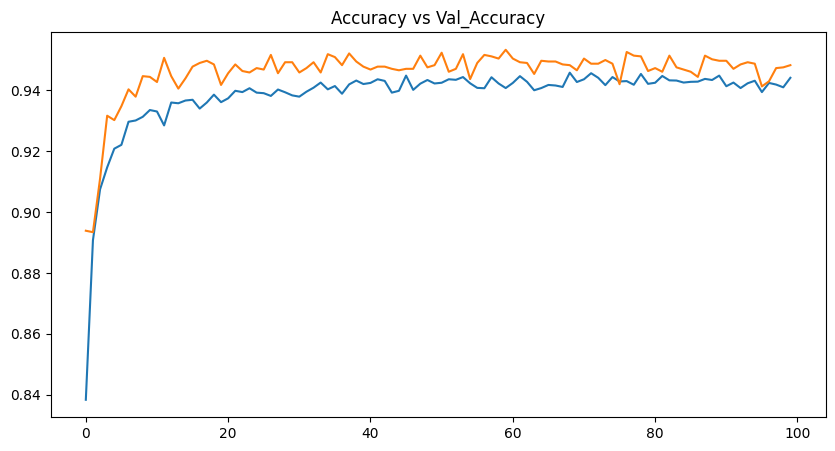

In [206]:
plt.figure(figsize= (10,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy vs Val_Accuracy")
plt.show()

In [207]:
# Evalution

y_pred = (Model.predict(X_test_transformed) > 0.5).astype("int")

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [209]:
y_pred.shape

(5196, 1)

In [210]:
pd.Series(y_pred.reshape(1,5196).tolist()[0]).value_counts()

0    2951
1    2245
Name: count, dtype: int64

In [211]:
accuracy_score(y_pred,y_test)

0.9515011547344111

In [212]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2951
           1       0.94      0.95      0.94      2245

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196



In [237]:
 #Model Saving

Model.save("air_ann.keras")

# hyperparameter Tuning

In [214]:
# pip install keras-tuner


In [238]:
import keras_tuner as kt
from tensorflow import keras

def build_model(hp):
    model = Sequential()

    # Input Layer
    # adding input layer from the X_train_transformed data
    model.add(InputLayer(shape=(X_train_transformed.shape[1],)))

    # Number of hidden layers
    num_layers = hp.Int("num_layers", min_value=2, max_value=5)

    for i in range(num_layers):
        
        units = hp.Int(f"units_{i}", min_value=32, max_value=256, step=32)
        reg = hp.Choice("l1_reg", values=[0.001, 0.003, 0.005])# 1-l
        dropout_rate = hp.Float("dropout", min_value=0.1, max_value=0.3, step=0.05)

        model.add(Dense(
            units=units,
            activation="relu",
            kernel_initializer="he_normal",
            kernel_regularizer=regularizers.l1(reg)
        ))
        model.add(Dropout(dropout_rate))
        model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(1,activation="sigmoid",kernel_initializer="glorot_normal"))

    # Learning Rate Tuning
    lr = hp.Choice("learning_rate", values=[1e-2, 5e-3, 1e-3, 5e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [239]:
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=20,              # Max training per model
    factor=3,                   # Hyperband reduction factor
    directory="hyperband_tuning",
    project_name="airline_satisfaction"
)
# BP
# 3-33.33
# Mod-M,F

In [240]:
tuner.search(
    X_train_transformed,
    y_train,
    validation_data=(X_val_transformed, y_val),
    epochs=30,
    batch_size=32
)
# validation_split
# bW

Trial 30 Complete [00h 00m 46s]
val_accuracy: 0.953079879283905

Best val_accuracy So Far: 0.953079879283905
Total elapsed time: 00h 09m 50s


In [241]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]


In [242]:
print("Best Hyperparameters:")
for key, value in best_hp.values.items():
    print(key, ":", value)


Best Hyperparameters:
num_layers : 4
units_0 : 256
l1_reg : 0.001
dropout : 0.1
units_1 : 128
learning_rate : 0.001
units_2 : 64
units_3 : 96
units_4 : 32
tuner/epochs : 20
tuner/initial_epoch : 0
tuner/bracket : 0
tuner/round : 0


In [245]:
# BUILDING MODEL WITH THE TUNED PARAMETERS

best_model = Sequential()

# Input Layer
best_model.add(InputLayer(shape=(X_train_transformed.shape[1],)))

# Hidden Layer 1
best_model.add(Dense(
    256, 
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=regularizers.l1(0.001)
))
best_model.add(Dropout(0.1))
best_model.add(BatchNormalization())

# Hidden Layer 2
best_model.add(Dense(
    128,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=regularizers.l1(0.001)
))
best_model.add(Dropout(0.1))
best_model.add(BatchNormalization())

# Hidden Layer 3
best_model.add(Dense(
    64,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=regularizers.l1(0.001)
))
best_model.add(Dropout(0.1))
best_model.add(BatchNormalization())

# Hidden Layer 4
best_model.add(Dense(
    96,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=regularizers.l1(0.001)
))
best_model.add(Dropout(0.1))
best_model.add(BatchNormalization())

# Output Layer
best_model.add(Dense(
    1,
    activation="sigmoid",
    kernel_initializer="glorot_normal"
))

# Compile the final model
best_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

best_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 256)                 │           5,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 96)                  │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,553 (217.00 KB)

 Trainable params: 54,465 (212.75 KB)

 Non-trainable params: 1,088 (4.25 KB)

In [246]:
history = best_model.fit(
    X_train_transformed,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32, 
    verbose=1
)

# BW


Epoch 1/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8610 - loss: 4.6567 - val_accuracy: 0.9263 - val_loss: 3.4146
Epoch 2/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8955 - loss: 2.6809 - val_accuracy: 0.9278 - val_loss: 2.0141
Epoch 3/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9002 - loss: 1.6464 - val_accuracy: 0.9188 - val_loss: 1.2956
Epoch 4/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9035 - loss: 1.1152 - val_accuracy: 0.8950 - val_loss: 0.9534
Epoch 5/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9121 - loss: 0.8008 - val_accuracy: 0.9164 - val_loss: 0.6780
Epoch 6/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9174 - loss: 0.6243 - val_accuracy: 0.9335 - val_loss: 0.5291
Epoch 7/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9171 - loss: 0.4997 - val_accuracy: 0.9308 - val_loss: 0.4164
Epoch 8/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9245 - loss: 0.4368 - val_accuracy: 0.

In [247]:
loss, acc = best_model.evaluate(X_test_transformed, y_test)
print("Test Accuracy:", acc)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9517 - loss: 0.2082
Test Accuracy: 0.951693594455719


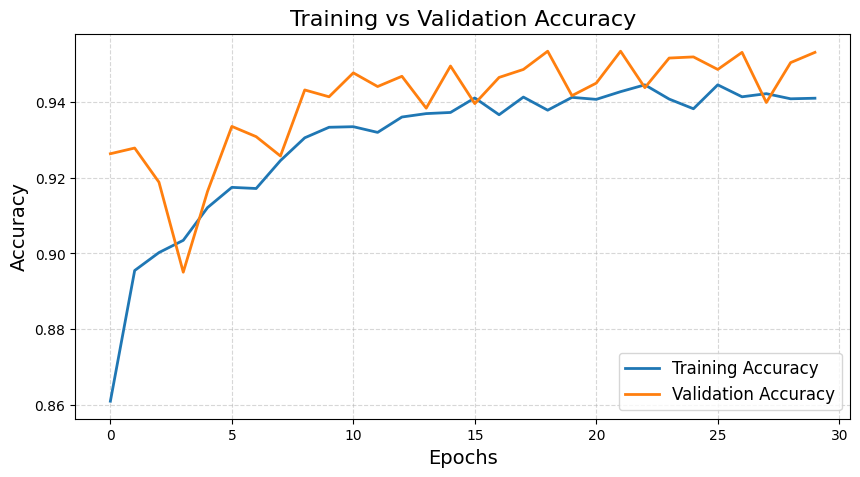

In [250]:
plt.figure(figsize=(10,5))

# Plot accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy", linewidth=2)

# Plot validation accuracy
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linewidth=2)

# Labels and title
plt.title("Training vs Validation Accuracy", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

# Display legend
plt.legend(fontsize=12)

# Add grid for clarity
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


In [253]:
pd.Series(y_pred.reshape(1,5196).tolist()[0]).value_counts()

0    2951
1    2245
Name: count, dtype: int64

In [254]:
accuracy_score(y_pred,y_test)

0.9515011547344111

In [255]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2951
           1       0.94      0.95      0.94      2245

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196



In [251]:
best_model.save("best_airline_ann_model.h5")


In [252]:
# understanding

In [157]:

X_train_transformed.shape[1]

22

In [158]:
X_train_transformed.shape

(16624, 22)

In [159]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,2.0,0.422929,-0.849782,-0.534219,0.622036,1.586244,0.794839,...,-0.339837,-1.008113,-1.079478,-1.019218,-1.387279,-1.041312,-1.394039,-0.214657,-0.383379,-0.394185
1,1.0,0.0,0.0,1.0,-0.959048,0.370007,0.211758,0.622036,0.880567,0.794839,...,-1.090793,-0.264530,-1.079478,-1.776840,0.310588,-1.829347,0.296297,-0.214657,-0.171226,-0.394185
2,1.0,0.0,1.0,0.0,1.278439,-0.258491,0.211758,0.622036,0.174891,0.017306,...,-0.339837,-1.008113,-0.300266,0.496028,1.159521,-0.253277,0.296297,-0.969885,-0.383379,-0.183149
3,1.0,0.0,1.0,0.0,-1.353899,-0.565198,-0.534219,-1.328431,-1.236462,0.794839,...,-1.841749,-0.264530,-1.079478,0.496028,0.310588,-1.829347,0.296297,-1.725113,6.219891,5.831372
4,1.0,0.0,1.0,1.0,-0.893240,1.063869,-0.534219,1.272192,-0.530785,-1.537761,...,-0.339837,-0.264530,0.478945,0.496028,0.310588,0.534759,0.296297,-0.214657,0.703906,0.265302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16619,1.0,1.0,0.0,0.0,-1.024857,-0.475700,0.211758,-0.028120,0.174891,0.794839,...,-1.090793,-0.264530,-1.858689,-1.019218,-0.538345,-1.829347,-1.394039,-0.214657,-0.383379,-0.394185
16620,0.0,0.0,0.0,2.0,0.159696,-0.302737,0.211758,-0.028120,0.174891,0.017306,...,1.162076,1.222635,1.258156,0.496028,1.159521,1.322794,1.141465,-0.214657,0.359157,0.344440
16621,1.0,0.0,1.0,0.0,1.541673,0.015031,-0.534219,0.622036,-0.530785,0.794839,...,-1.090793,-1.008113,-1.079478,-1.019218,0.310588,0.534759,0.296297,-0.969885,1.632077,1.357412
16622,0.0,0.0,0.0,1.0,-1.090665,-0.857827,-0.534219,1.272192,1.586244,1.572372,...,-1.090793,-1.008113,-1.079478,-0.261595,0.310588,-1.041312,0.296297,-0.969885,-0.356860,-0.315047
